In [1]:
#USING THIS TUTORIAL
#  https://github.com/krikit/syntaxnet/blob/master/syntaxnet.ipynb
import nltk
from IPython.display import Image, display
from nltk import Tree
from nltk.draw.util import CanvasFrame
from nltk.draw import TreeWidget

In [2]:
import os
from nltk.parse import stanford

In [3]:
with open('data/out_defs.txt','r') as f1:
    all_data_texts = f1.readlines()

FileNotFoundError: [Errno 2] No such file or directory: 'data/out_defs.txt'

In [4]:
#raw = all_data_texts[105]
raw = 'For every n let G_n be a group of size n.'
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
sents = sent_detector.tokenize(raw)


print('========== SENTENCES ==========')
print('\n'.join(sents))

print('========== TOKENIZED ==========')
tokenized_sents = []
for sent in sents:
    words = nltk.word_tokenize(sent)
    tokenized_sents.append(words)
    print(' '.join(words))

========== SENTENCES ==========
For every n let G_n be a group of size n.
========== TOKENIZED ==========
For every n let G_n be a group of size n .


In [5]:
tagged_sents = []
for tokens in tokenized_sents:
    tagged_pairs = nltk.pos_tag(tokens)
    tagged_sents.append(tagged_pairs)
    print(' '.join(['%s/%s' % (word, tag) for word, tag in tagged_pairs]))


For/IN every/DT n/JJ let/NN G_n/NNP be/VB a/DT group/NN of/IN size/NN n/NNS ./.


In [8]:
import os
from nltk.parse import stanford
#STANFORD_DIR = '/home/luis/Paquetes/stanford-parser-full-2018-02-27' 
STANFORD_DIR = '/home/luis/Paquetes/stanford-parser-full-2018-02-27' 
os.environ['STANFORD_PARSER'] = '%s/stanford-parser.jar' % STANFORD_DIR
os.environ['STANFORD_MODELS'] = '%s/stanford-parser-3.9.1-models.jar' % STANFORD_DIR
parser = stanford.StanfordParser(model_path='%s/models/edu/stanford/nlp/models/lexparser/englishPCFG.ser.gz' % STANFORD_DIR)
parsed_sents = []
for tree in parser.tagged_parse_sents(tagged_sents):
    tree_sent = '\n'.join([str(_) for _ in tree])
    parsed_sents.append(tree_sent)
    print(tree_sent)

SLF4J: Failed to load class "org.slf4j.impl.StaticLoggerBinder".
SLF4J: Defaulting to no-operation (NOP) logger implementation
SLF4J: See http://www.slf4j.org/codes.html#StaticLoggerBinder for further details.
java.io.IOException: Unable to open "/home/luis/Paquetes/stanford-parser-full-2018-02-27/models/edu/stanford/nlp/models/lexparser/englishPCFG.ser.gz" as class path, filename or URL
	at edu.stanford.nlp.io.IOUtils.getInputStreamFromURLOrClasspathOrFileSystem(IOUtils.java:480)
	at edu.stanford.nlp.io.IOUtils.readerFromString(IOUtils.java:617)
	at edu.stanford.nlp.parser.lexparser.LexicalizedParser.getParserFromTextFile(LexicalizedParser.java:541)
	at edu.stanford.nlp.parser.lexparser.LexicalizedParser.getParserFromFile(LexicalizedParser.java:406)
	at edu.stanford.nlp.parser.lexparser.LexicalizedParser.loadModel(LexicalizedParser.java:186)
	at edu.stanford.nlp.parser.lexparser.LexicalizedParser.main(LexicalizedParser.java:1400)
Exception in thread "main" java.lang.NullPointerExcepti

<ipython-input-8-0bf7415457f7>:7: DeprecationWarning: The StanfordParser will be deprecated
Please use nltk.parse.corenlp.CoreNLPParser instead.
  parser = stanford.StanfordParser(model_path='%s/models/edu/stanford/nlp/models/lexparser/englishPCFG.ser.gz' % STANFORD_DIR)


OSError: Java command failed : ['/usr/bin/java', '-mx4g', '-cp', '/home/luis/Paquetes/stanford-parser-full-2018-02-27/stanford-parser-3.9.1-models.jar:/home/luis/Paquetes/stanford-parser-full-2018-02-27/stanford-parser.jar:/home/luis/Paquetes/stanford-parser-full-2018-02-27/ejml-0.23.jar:/home/luis/Paquetes/stanford-parser-full-2018-02-27/slf4j-api.jar:/home/luis/Paquetes/stanford-parser-full-2018-02-27/stanford-parser-3.9.1-models.jar:/home/luis/Paquetes/stanford-parser-full-2018-02-27/slf4j-api-1.7.12-sources.jar:/home/luis/Paquetes/stanford-parser-full-2018-02-27/stanford-parser-3.9.1-sources.jar:/home/luis/Paquetes/stanford-parser-full-2018-02-27/stanford-parser-3.9.1-javadoc.jar', 'edu.stanford.nlp.parser.lexparser.LexicalizedParser', '-model', '/home/luis/Paquetes/stanford-parser-full-2018-02-27/models/edu/stanford/nlp/models/lexparser/englishPCFG.ser.gz', '-sentences', 'newline', '-outputFormat', 'penn', '-tokenized', '-tagSeparator', '/', '-tokenizerFactory', 'edu.stanford.nlp.process.WhitespaceTokenizer', '-tokenizerMethod', 'newCoreLabelTokenizerFactory', '-encoding', 'utf8', '/tmp/tmpy0hs3ulh']

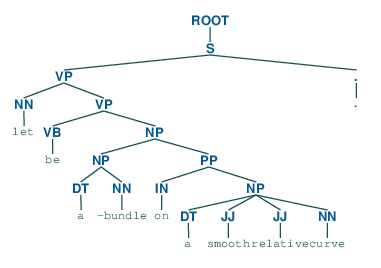

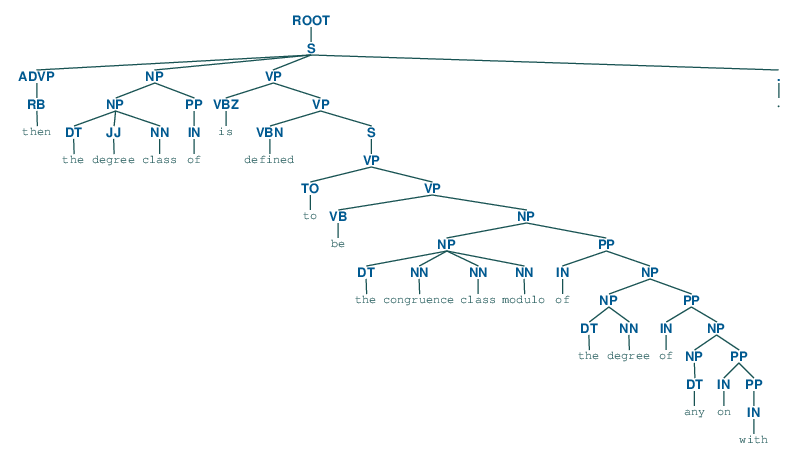

In [8]:
for idx, tree_str in enumerate(parsed_sents):
    cf = CanvasFrame()
    tree = Tree.fromstring(tree_str)
    tc = TreeWidget(cf.canvas(), tree)
    tc['node_font'] = 'arial 13 bold'
    tc['leaf_font'] = 'arial 12'
    tc['node_color'] = '#005990'
    tc['leaf_color'] = '#175252'
    tc['line_color'] = '#175252'
    cf.add_widget(tc, 10, 10)
    cf.print_to_file('tmp.ps')
    cf.destroy()
    os.system('convert tmp.ps tmp.png')    # need install: libpng, ghostscript, imagemagic
    display(Image(filename='tmp.png'))
    #os.remove('tmp.ps')
    #os.remove('tmp.png')